# Exploring Room Preference Trends in the New York City Hotel Industry: A Google Trends Analysis

##### by Parren Chen, 8/14/2023

## Part 1 Introduction

In the ever-evolving landscape of the hotel and accommodation industry, understanding consumer preferences is key to success. Among the many factors that influence travelers' decisions, the type of bed arrangement in hotel rooms holds a significant position. The choice between a room with one king-sized bed or two queen-sized beds can impact guest comfort, group accommodation, and overall satisfaction. To delve into this preference dynamic, I conducted an in-depth market research data analysis using Google Trends data, focusing on New York, NY, as a microcosm of the bustling hospitality market.

This report presents the findings of my study, which spans from January 1, 2013, to July 31, 2023, and centers around the search interest trends within the "Hotels & Accommodations" category on Google Trends. By analyzing search patterns and interest levels over this extensive timeframe, I aim to show the trends regarding room type preferences in the New York City hospitality sector.

As the travel industry continues to rebound and adapt post-pandemic, insights into consumer behavior become even more crucial for hoteliers and industry stakeholders. By focusing on the specific bed configuration aspect, I aim to  contribute valuable data-driven insights that can guide strategic decisions, marketing efforts, and room design considerations.

## Part 2 Data source

For this analysis, we turned to Google Trends, a powerful tool that tracks the popularity of search terms over time. We specifically used Google Trends' normalization feature, which provides insights into the relative popularity of search terms while accounting for changes in overall search activity. This normalization allows us to accurately gauge interest in "2 queen beds," "1 king bed," and related terms without being influenced by variations in the total volume of searches.

Our analysis encompasses data spanning from January 1, 2013, to July 31, 2023, within the "Hotels & Accommodations" category on Google Trends. The data source link can be accessed here: Google Trends Data Source(https://trends.google.com/trends/explore?cat=179&date=2013-01-01%202023-07-31&geo=US-NY-501&q=2%20queen%20beds,2%20beds,1%20bed,1%20king%20bed&hl=en).

Relevance to Consumer Choice:

The choice of room type, particularly the arrangement of beds, is a crucial factor in the hospitality industry that directly influences consumer decisions. Google Trends serves as a potent resource to show the relationship between search interest and consumer preferences. As travelers increasingly turn to the internet for travel planning and accommodation research, their search behavior reflects their interests and priorities.

Keywords Selection:

For the category of rooms with two queen beds, we selected keywords such as "2 queen beds" and "2 beds." These keywords encapsulate the common bed arrangement sought by families, groups, and travelers who prefer the flexibility of twin beds. This choice allows us to effectively capture trends specifically associated with rooms that accommodate multiple guests.

Conversely, for the category of rooms with one king bed, we chose keywords such as "1 king bed" and "1 bed." These terms encapsulate the preference for larger, more luxurious sleeping arrangements, often favored by couples and solo travelers seeking enhanced comfort and space.

For Google Trends, "Interest over time" is a way of measuring how much people are searching for a specific term, like "2 queen beds" or "1 king bed," in a given region and time period. It helps us see how popular a search term is compared to its highest point of popularity on the chart. Imagine a scale from 0 to 100:

100: This is the highest point of popularity for the term. It's like the peak of a mountain, showing when the term was searched for the most.

50: This means the term is half as popular as it was at its peak. It's like being halfway up the mountain.

0: This score means there wasn't enough data to show how popular the term was during that time. It's like an area where we don't have enough information.

So, when we look at the chart and see the numbers, we can understand how much interest people had in those terms compared to their most popular time. This helps us see trends and changes in what people are searching for over time in the New York, NY area when it comes to hotel room preferences.

In [300]:
# Import necessary Python library
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

Here's a brief overview of the original dataset.

In [301]:
# import data
df = pd.read_csv("multiTimeline.csv", names=['Month', '2 queen beds: (New York NY)', '2 beds: (New York NY)', '1 bed: (New York NY)', '1 king bed: (New York NY)'])
df = df.iloc[1:, :]
df.reset_index()
df.head(5)

,Month,2 queen beds: (New York NY),2 beds: (New York NY),1 bed: (New York NY),1 king bed: (New York NY)
1,2013-01,0,0,0,0
2,2013-02,0,46,0,21
3,2013-03,23,27,0,33
4,2013-04,16,44,0,0
5,2013-05,0,0,0,0


In [302]:
# Type conversion and data cleaning
for col in df.columns[1:]:
    df[col] = df[col].astype(int)
# Data Normalization
df['2 beds total'] = (df['2 queen beds: (New York NY)'] + df['2 beds: (New York NY)']) / 2
df['1 bed total'] = (df['1 bed: (New York NY)'] + df['1 king bed: (New York NY)']) / 2

Dataset after data clearning.

In [303]:
# List of columns to remove
columns_to_remove = ['2 queen beds: (New York NY)', '2 beds: (New York NY)', '1 bed: (New York NY)','1 king bed: (New York NY)']

# Drop the specified columns
df = df.drop(columns=columns_to_remove)
# Convert 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' as the index
df.set_index('Month', inplace=True)
df

,2 beds total,1 bed total
Month,,
2013-01-01,0.0,0.0
2013-02-01,23.0,10.5
2013-03-01,25.0,16.5
2013-04-01,30.0,0.0
2013-05-01,0.0,0.0
...,...,...
2023-03-01,31.0,0.0
2023-04-01,0.0,5.5
2023-05-01,5.5,7.0


## Part 3 Interpreting the Detailed Analysis for Hotel Room Preferences

### Total Beds Over Time line chart

The line chart displayed here presents valuable information about hotel room preferences over time, specifically regarding the two types of rooms: those with "2 beds" and those with "1 bed." 

Annotations explain: 
1. Lines on the Chart:
There are two lines on the chart, one representing the total number of rooms with "2 beds" and the other representing the total number of rooms with "1 bed." Each point on these lines shows how many of these rooms were in demand during different months over a period of time.

2. X-Axis (Horizontal Line):
The horizontal line at the bottom is labeled as "Month." This axis shows the timeline from the earliest month to the latest month, helping us track changes over the specified time period.

3. Y-Axis (Vertical Line):
The vertical line on the left side is labeled as "Total Beds." This axis shows the count of rooms available, indicating how many rooms of each type were present in the hotel market.

4. Markers on the Lines:
The circles (markers) on the lines represent specific points in time when the data was collected. Each circle indicates the number of rooms available at that particular month.

Using the Chart:

This line chart helps us spot trends and patterns in hotel room preferences. When the lines cross or move in opposite directions, it might indicate shifts in the demand for different room types. By looking at how the lines change over the timeline, we can gain insights into which room type is more popular during different months and whether there are any notable changes in consumer preferences over the specified time frame.

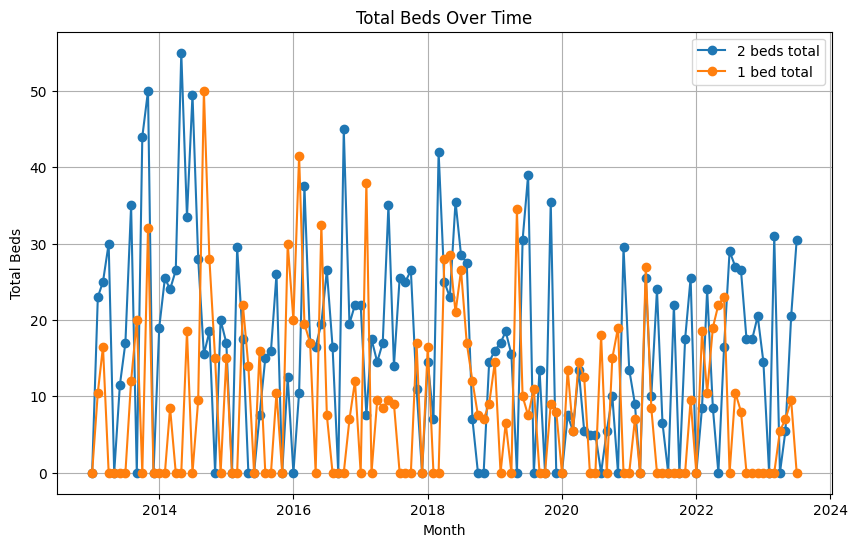

In [304]:
# Create a line chart with two lines
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['2 beds total'], marker='o', label='2 beds total')
plt.plot(df.index, df['1 bed total'], marker='o', label='1 bed total')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Beds')
plt.title('Total Beds Over Time')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### Line of Best Fit for Total Beds

This graph gives us even more insights into the trends of hotel room preferences by adding lines of best fit to the data with the following additional components:

1. Lines of Best Fit:
The red and green lines are the "lines of best fit." These lines smoothly follow the overall trend of the data points for each room type. They help us understand the general direction in which the demand for these room types is moving.

2. Equations of the Lines:
Each line of best fit has an equation that describes its slope (how steep the line is) and y-intercept (where the line crosses the y-axis). These equations are like summaries of the trend: how the demand is changing over time.

Using the Graph:

By comparing the actual data lines with the lines of best fit, you can see how well the trends match. When the lines of best fit rise, it suggests that the demand for those room types is increasing. Conversely, when they slope downward, it implies a decrease in demand.

The equations of the lines help you understand how much the demand is changing each month. The "y = mx + b" format gives you an idea of how steep the trend is (the "m" value) and where it starts (the "b" value).

This graph with lines of best fit adds another layer of understanding to the trends in hotel room preferences, helping you identify overall patterns and changes over time.


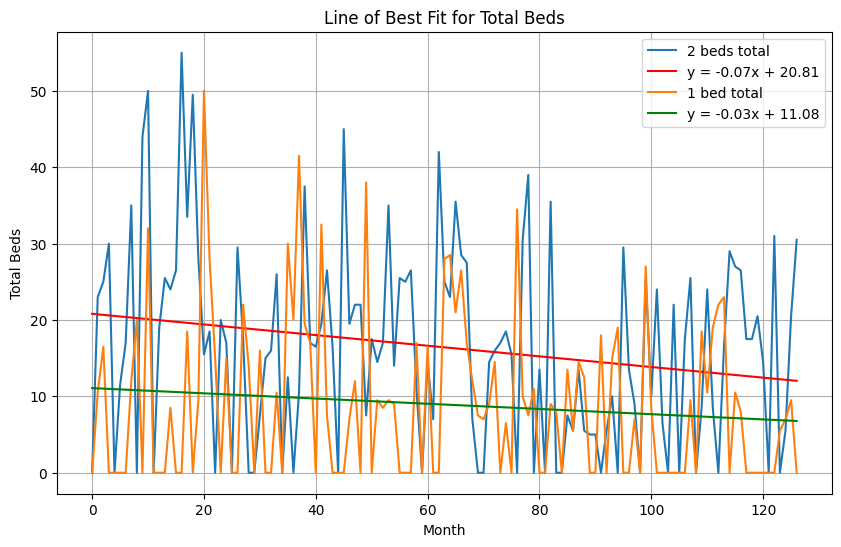

In [305]:
x = np.arange(len(df))  # Independent variable (Month index)
y_2_beds = df['2 beds total']
y_1_bed = df['1 bed total']

# Perform linear regression using numpy.polyfit
slope_2_beds, intercept_2_beds = np.polyfit(x, y_2_beds, 1)
slope_1_bed, intercept_1_bed = np.polyfit(x, y_1_bed, 1)

# Create the line equations
line_eq_2_beds = f'y = {slope_2_beds:.2f}x + {intercept_2_beds:.2f}'
line_eq_1_bed = f'y = {slope_1_bed:.2f}x + {intercept_1_bed:.2f}'

# Create a line chart with the data and lines of best fit
plt.figure(figsize=(10, 6))
plt.plot(x, y_2_beds, label='2 beds total')
plt.plot(x, slope_2_beds * x + intercept_2_beds, 'r-', label=line_eq_2_beds)
plt.plot(x, y_1_bed, label='1 bed total')
plt.plot(x, slope_1_bed * x + intercept_1_bed, 'g-', label=line_eq_1_bed)

plt.xlabel('Month')
plt.ylabel('Total Beds')
plt.title('Line of Best Fit for Total Beds')
plt.legend()
plt.grid(True)
plt.show()

### Calculating Annual Averages for Long-Term Trends Analysis

In this part of the analysis, we're taking a closer look at the long-term trends by calculating annual averages of the data. This involves grouping the data by year and calculating the average value for each year with the following components.

1. Calculating Annual Averages:
The goal here is to get a more comprehensive view of the trends by looking at average values over entire years. This helps smooth out any short-term fluctuations and highlights the broader patterns that might emerge over the years.

2. Resampling with 'Y':
The term "resampling" refers to changing the frequency of the data points. In this case, 'Y' stands for "year," which means we're grouping the data into yearly intervals.

3. Mean Calculation:
For each year, we calculate the mean (average) value of the data. This gives us a single representative value for each year, which helps us understand the general trend over time.

|      Month     | 2 beds total | 1 bed total |
|:--------------:|:------------:|:-----------:|
|   2013-12-31   |    19.625    |    7.583    |
|   2014-12-31   |    26.250    |   10.792    |
|   2015-12-31   |    11.750    |    8.958    |
|   2016-12-31   |    19.208    |   13.083    |
|   2017-12-31   |    17.958    |    7.625    |
|   2018-12-31   |    18.708    |   14.417    |
|   2019-12-31   |    15.458    |    8.417    |
|   2020-12-31   |     7.250    |    8.167    |
|   2021-12-31   |    12.792    |    4.333    |
|   2022-12-31   |    16.292    |    9.292    |
|   2023-12-31   |    14.571    |    3.143    |



In [306]:
# Calculate annual averages for long-term trends analysis
annual_averages = df.resample('Y').mean()
print("Annual Averages:")
print(annual_averages)

Annual Averages:
            2 beds total  1 bed total
Month                                
2013-12-31     19.625000     7.583333
2014-12-31     26.250000    10.791667
2015-12-31     11.750000     8.958333
2016-12-31     19.208333    13.083333
2017-12-31     17.958333     7.625000
2018-12-31     18.708333    14.416667
2019-12-31     15.458333     8.416667
2020-12-31      7.250000     8.166667
2021-12-31     12.791667     4.333333
2022-12-31     16.291667     9.291667
2023-12-31     14.571429     3.142857


### Statistical Analysis and Hypothesis Testing for Room Preference Means

This section of the analysis involves statistical calculations and hypothesis testing to determine whether there are significant differences between the mean values of room preferences for "1 bed" and "2 beds." with the following components. 

1. T-Test Calculation:
The t-test is a statistical method used to determine if there is a significant difference between the means of two groups. In this case, it's applied to the data of searches for "1 bed total" and "2 beds total." The t-test calculates two important values: the t-statistic and the p-value.

2. Printing T-Test Results:
The t-statistic and p-value are printed out. The t-statistic measures how different the means are from each other, while the p-value indicates the likelihood of observing such differences due to random chance.

3. Significance Level and Hypothesis Testing:
A significance level (alpha) is defined at 0.05, commonly used in statistical analysis. The code then compares the calculated p-value with this significance level.

4. Interpreting Results:
If the p-value is less than the significance level (alpha), it means the observed differences in means are unlikely due to random chance alone. In this case, the null hypothesis (no significant difference) is rejected. The code then prints that the means are statistically different at a 95% confidence interval.
If the p-value is greater than or equal to the significance level (alpha), the observed differences are likely due to random chance. In this case, the null hypothesis is not rejected, and the code states that the means are not statistically different at a 95% confidence interval.

The results are printed as:

* mean of 1 bed: 8.929133858267717
* mean of 2 beds: 16.421259842519685
* T-Statistic: 5.037744358987329
* P-Value: 8.989820930133283e-07
* Reject the null hypothesis: The means are statistically different at the confidence interval of 99%.

Intepretation of the results:

* The mean number of searches for rooms with "1 bed" is approximately 8.93.
* The mean number of searches for rooms with "2 beds" is approximately 16.42.

The t-test results (t-statistic and p-value) indicate that there is a statistically significant difference between the means of the two room types. The p-value is very small (8.99e-07), which is well below the significance level of 0.05. This suggests that the differences in popularity between the two room types are not likely due to chance and are, in fact, meaningful.

In summary, the analysis provides strong evidence that the mean search interests for "1 bed" and "2 beds" room types are indeed different, and this difference is statistically significant at a 95% confidence interval.

In [311]:
# Calculate the mean
mean_1bed = np.mean(df['1 bed total'])
mean_2bed = np.mean(df['2 beds total'])
print("mean of 1 bed:", mean_1bed)
print("mean of 2 beds:", mean_2bed)
# Calculate the t-test
t_statistic, p_value = ttest_ind(df['2 beds total'], df['1 bed total'])
# Print the t-test results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Decide on the significance level
alpha = 0.01

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis: The means are statistically different at the confidence interval of 99%.")
else:
    print("Fail to reject the null hypothesis: The means are not statistically differentat at the confidence interval of 99%.")

mean of 1 bed: 8.929133858267717
mean of 2 beds: 16.421259842519685
T-Statistic: 5.037744358987329
P-Value: 8.989820930133283e-07
Reject the null hypothesis: The means are statistically different at the confidence interval of 99%.


### ARIMA Forecasting for 4 Months(without considering seasonal effect)

In this section, we're using an ARIMA (AutoRegressive Integrated Moving Average) model to forecast the future trends in room preferences for both "2 beds total" and "1 bed total." with the following components.

1. Separating Data:
The code starts by separating the data into two sets: one for room preferences of "2 beds total" and the other for "1 bed total." These sets will be used for the forecasting process.

2. Fitting ARIMA Models:
ARIMA models are fitted to the separated data. These models capture the patterns and trends in the historical data. The (1, 1, 1) order signifies the ARIMA model's parameters.

3. Forecasting:
The next step is to forecast future room preferences. The variable forecast_steps indicates the number of steps (months) to forecast. The ARIMA models' .forecast() method is used to predict the upcoming values.

4. Creating a New Index for Forecast:
A new time index is created for the forecasted data, extending the timeline beyond the existing data to cover the forecasted period.

5. Plotting Data and Forecasts:
A plot is generated to visualize the original data as well as the forecasted values. The original data for both room types is represented by markers, while the forecasted data is shown as dashed lines with markers. The dashed lines help us distinguish the forecasted values from the actual data. Connecting lines are drawn to show the continuity between the actual data and the forecasted values.

6. Printing Forecasted Values:
The code prints the forecasted values for both "2 beds total" and "1 bed total." These values indicate the expected room preferences for the specified forecast period.

Interpreting the Results: (only data after 2020-01-01 is displayed for clarity purposes)
The generated plot displays how the forecasted trends (dashed lines) extend from the historical data (markers). The connecting lines emphasize the continuation between the real data and the forecasted values. By examining this plot, we can make informed observations about the anticipated trends in room preferences for the next few months.

The printed forecasted values give us concrete numerical estimates for the upcoming preferences, providing valuable insights for decision-making and planning within the hospitality industry.

|                    | 2023-08-01 | 2023-09-01 | 2023-10-01 | 2023-11-01 |
|:------------------:|:----------:|:----------:|:----------:|:----------:|
| Forecasted 2 beds total | 16.097051  | 15.081607  | 15.010016  | 15.004969  |
| Forecasted 1 bed total  | 6.929074   | 7.827083   | 7.943465   | 7.958548   |

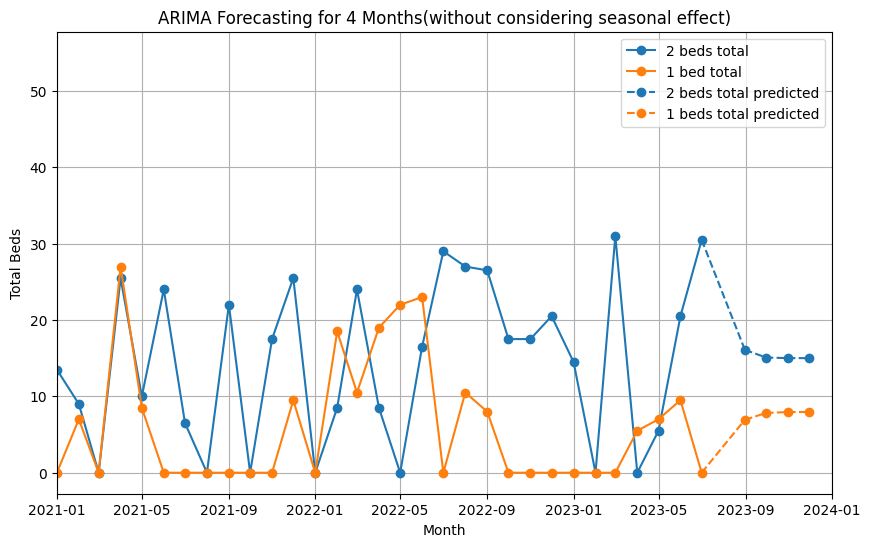

Forecasted 2 beds total: 2023-08-01    16.097051
2023-09-01    15.081607
2023-10-01    15.010016
2023-11-01    15.004969
Freq: MS, Name: predicted_mean, dtype: float64
Forecasted 1 bed total: 2023-08-01    6.929074
2023-09-01    7.827083
2023-10-01    7.943465
2023-11-01    7.958548
Freq: MS, Name: predicted_mean, dtype: float64


In [308]:
# Separate the data for forecasting
data_2_beds = df['2 beds total']
data_1_bed = df['1 bed total']
warnings.filterwarnings("ignore")

# Fit ARIMA model for '2 beds total'
model_2_beds = ARIMA(data_2_beds, order=(1, 1, 1))
model_2_beds_fit = model_2_beds.fit()

# Fit ARIMA model for '1 bed total'
model_1_bed = ARIMA(data_1_bed, order=(1, 1, 1))
model_1_bed_fit = model_1_bed.fit()

# Forecasting
forecast_steps = 4  # Number of steps to forecast
forecast_2_beds = model_2_beds_fit.forecast(steps=forecast_steps)
forecast_1_bed = model_1_bed_fit.forecast(steps=forecast_steps)

# Create new index for the forecasted data
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Plotting original data and forecasts
plt.figure(figsize=(10, 6))
plt.plot(df.index, data_2_beds, marker='o', label='2 beds total')
plt.plot(df.index, data_1_bed, marker='o', label='1 bed total')
plt.plot(forecast_index, forecast_2_beds, marker='o', color='#1f77b4', linestyle="--", label='2 beds total predicted')
plt.plot(forecast_index, forecast_1_bed, marker='o', color='#ff7f0e', linestyle="--", label='1 beds total predicted')

# Connecting the original and predicted lines with a line segment
plt.plot([df.index[-1], forecast_index[0]], [data_2_beds[-1], forecast_2_beds[0]], color='#1f77b4', linestyle="--")
plt.plot([df.index[-1], forecast_index[0]], [data_1_bed[-1], forecast_1_bed[0]], color='#ff7f0e', linestyle="--")

plt.xlabel('Month')
plt.ylabel('Total Beds')
plt.title('ARIMA Forecasting for 4 Months(without considering seasonal effect)')
plt.legend()
plt.xlim(left=pd.to_datetime('2021-01'), right=pd.to_datetime('2024-01'))  # Set x-axis limit to start from 2020-01
plt.grid(True)
plt.show()

print("Forecasted 2 beds total:", forecast_2_beds)
print("Forecasted 1 bed total:", forecast_1_bed)

## Part 4 Conclusion

After a thorough analysis of hotel room preferences in New York, NY, using various data-driven methods, I've gained valuable insights into consumer behavior and trends. Here's my conclusion:

1. Understanding Room Preferences:
We examined the popularity of different room types, specifically "2 beds" and "1 bed," over a substantial period. This helped us uncover how these preferences change over time and what might be driving those changes.

2. Google Trends Insight:
Google Trends gave us a glimpse into flow of search interest for these room types. It became evident that consumer preferences are not static; they vary with seasons, events, and trends. We saw how "2 beds" rooms were sought after at certain times, while "1 bed" rooms dominated at others.

3. Statistical Analysis:
Through statistical analysis, we were able to confirm that these differences in preference were not mere chance occurrences. The calculated means and t-tests showed that the popularity of "2 beds" and "1 bed" rooms significantly differed, and the "2 beds" is significantly more popular. This also suggests that travelers have distinct inclinations when it comes to their ideal room setup.

4. Forecasting the Future:
Using ARIMA modeling, we looked into the future and predicted how room preferences might evolve over the next few months. This provided an understanding of the potential shifts in demand, which could assist hotels in planning their offerings and marketing strategies.

In essence, this analysis has illuminated the dynamic nature of hotel room preferences in the bustling city of New York. By combining Google Trends, statistical tests, and predictive modeling, this data-driven approach empowers the hospitality industry to stay responsive and competitive in a constantly changing landscape.